<a href="https://colab.research.google.com/github/choisungmin123/deep-learning-practice/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [34]:
from tensorflow.keras.models import Sequential # keras 라이브러리의 models class에서 Sequential 함수 불러오기
from tensorflow.keras.layers import Dense, Input # layer class에서 Dense 함수 불러오기
from keras.utils import plot_model
import numpy as np #데이터 전처리를 위해 사용하는 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


### 2. 데이터 준비

In [35]:
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
print(df.head())

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

fatal: destination path 'data' already exists and is not an empty directory.
   0     1     2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   1  2.88  2.16   1   0   0   0   1   1   3   0   0   0   1   0  60   0
1   2  3.40  1.88   0   0   0   0   0   0   1   0   0   0   1   0  51   0
2   2  2.76  2.08   1   0   0   0   1   0   0   0   0   0   1   0  59   0
3   2  3.68  3.04   0   0   0   0   0   0   0   0   0   0   0   0  54   0
4   2  2.44  0.96   2   0   1   0   1   1   0   0   0   0   1   0  73   1


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. 구조 결정

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

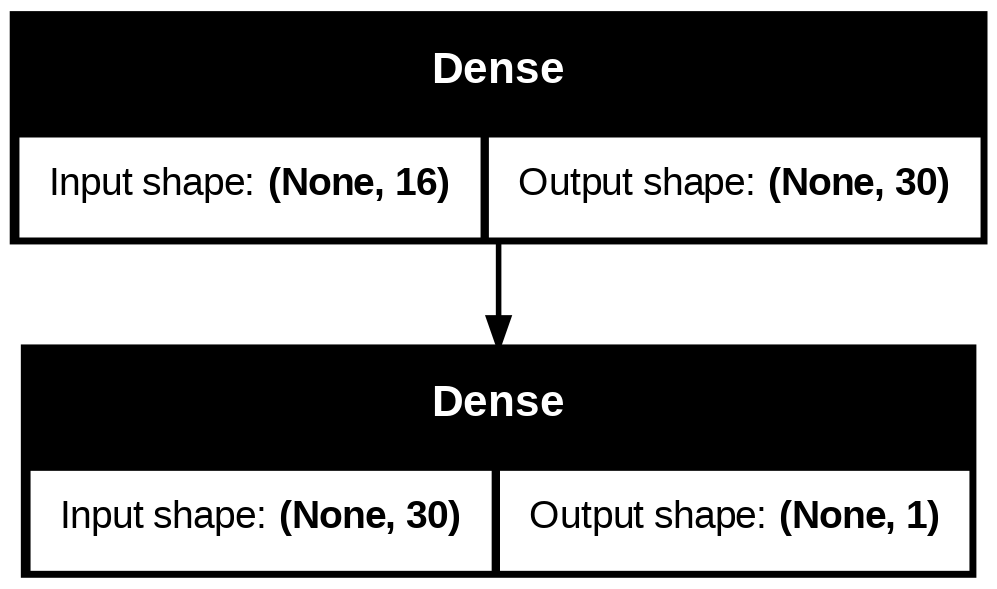

In [39]:
model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
plot_model(model,show_shapes=True)
plot_model(model,show_shapes=True)



### 4. 모델 실행

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8723 - loss: 0.4131
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8167 - loss: 0.5045
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8617 - loss: 0.4097
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8681 - loss: 0.3848
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3818


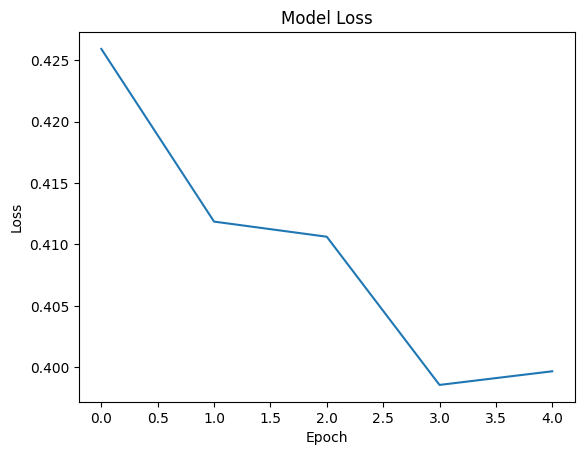

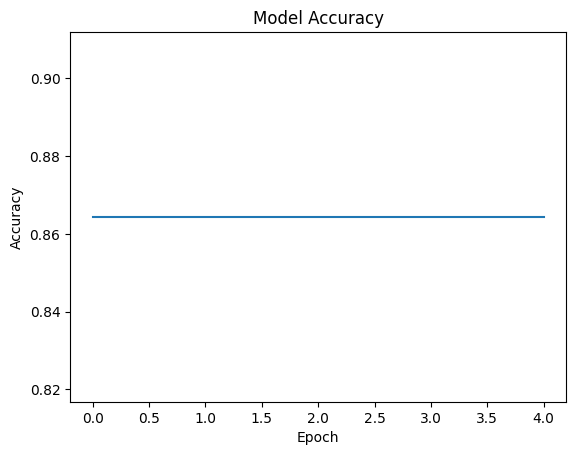

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7974 - loss: 0.6324 
Test Loss: 0.6557
Test Accuracy: 0.7979


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=5, batch_size=16)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

loss, accuracy = model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


In [33]:
history.history


{'accuracy': [0.1595744639635086,
  0.38297873735427856,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [7.568305015563965,
  1.6245228052139282,
  0.47505390644073486,
  0.4615490734577179,
  0.4541415572166443]}

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

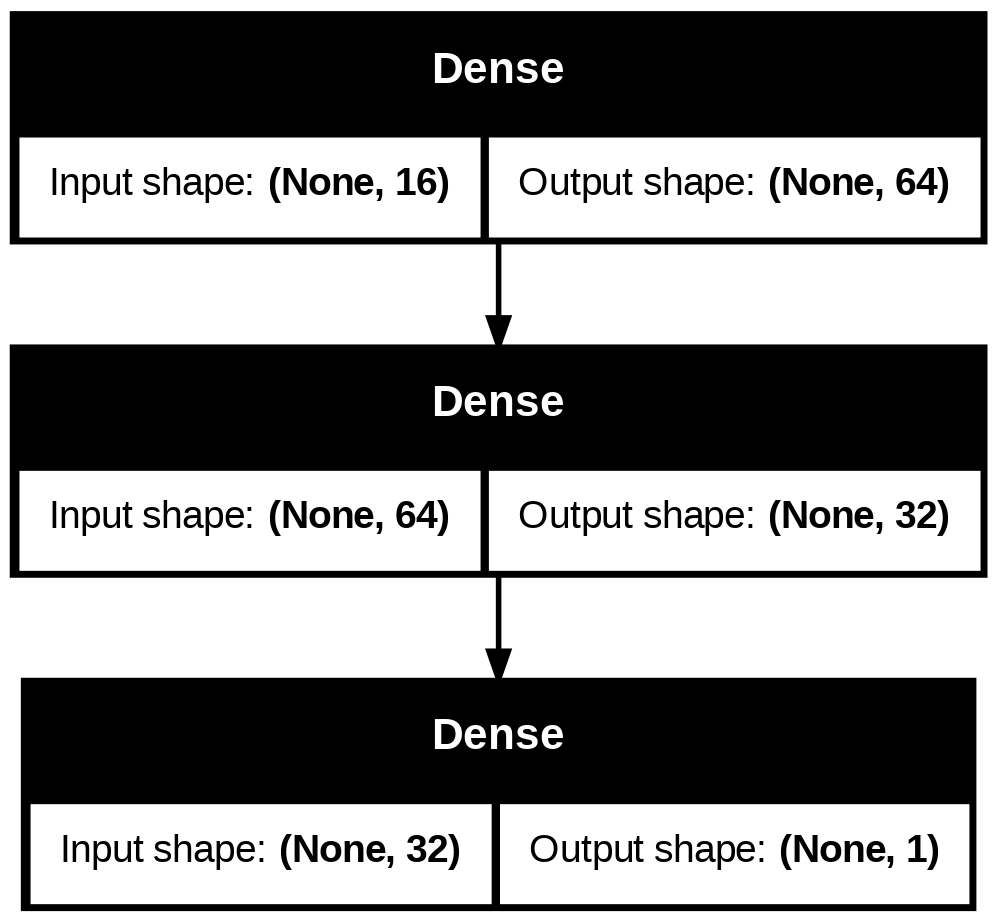

In [42]:
model2 = Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()
plot_model(model2,show_shapes=True)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7482 - loss: 0.6077
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.6260 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8960 - loss: 0.3685 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.4267 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.3898


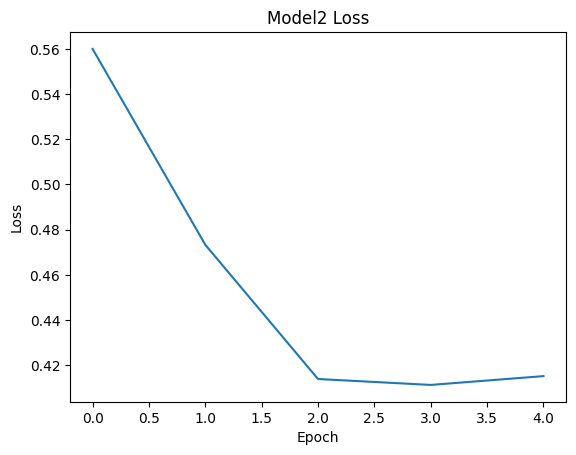

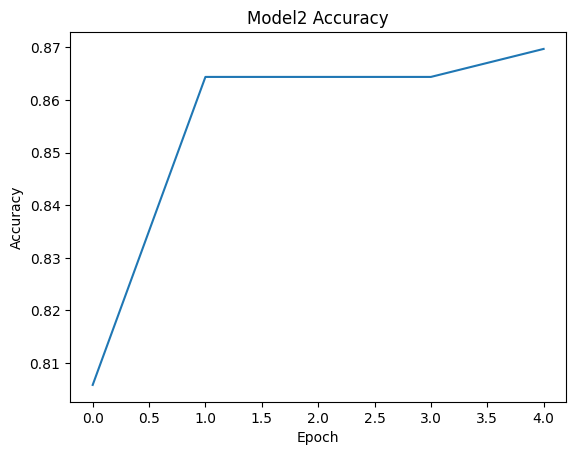

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7974 - loss: 0.7310 
Model2 Test Loss: 0.7569
Model2 Test Accuracy: 0.7979


In [46]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=16)

plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model2 Loss')
plt.show()

plt.plot(history2.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model2 Accuracy')
plt.show()

loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model2 Test Loss: {loss2:.4f}")
print(f"Model2 Test Accuracy: {accuracy2:.4f}")